In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os

pd.set_option('display.max_columns', None)

In [2]:
if os.path.exists('./mushrooms.csv'):
    print('mushrooms.csv already exists')
else:
    import kaggle
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('uciml/mushroom-classification', path='./', unzip=True)
df = pd.read_csv('mushrooms.csv')


mushrooms.csv already exists


In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns



Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
class_mapping = {'e': 'comestible', 'p': 'venenoso'}
cap_shape_mapping = {'b': 'campana', 'c': 'cónica', 'x': 'convexa', 'f': 'plana', 'k': 'abombada', 's': 'hundida'}
cap_surface_mapping = {'f': 'fibrosa', 'g': 'surcos', 'y': 'escamosa', 's': 'lisa'}
cap_color_mapping = {'n': 'marrón', 'b': 'marrón claro', 'c': 'canela', 'g': 'gris', 'r': 'verde', 'p': 'rosa', 'u': 'púrpura', 'e': 'rojo', 'w': 'blanco', 'y': 'amarillo'}
bruises_mapping = {'t': 'magulladuras', 'f': 'ninguna'}
odor_mapping = {'a': 'almendra', 'l': 'anís', 'c': 'creosota', 'y': 'a pescado', 'f': 'fétido', 'm': 'mohoso', 'n': 'ninguno', 'p': 'picante', 's': 'especiado'}
gill_attachment_mapping = {'a': 'unido', 'd': 'descendente', 'f': 'libre', 'n': 'muesca'}
gill_spacing_mapping = {'c': 'cercano', 'w': 'apretado', 'd': 'distante'}
gill_size_mapping = {'b': 'ancho', 'n': 'angosto'}
gill_color_mapping = {'k': 'negro', 'n': 'marrón', 'b': 'marrón claro', 'h': 'chocolate', 'g': 'gris', 'r': 'verde', 'o': 'naranja', 'p': 'rosa', 'u': 'púrpura', 'e': 'rojo', 'w': 'blanco', 'y': 'amarillo'}
stalk_shape_mapping = {'e': 'ensanchándose', 't': 'afinándose'}
stalk_root_mapping = {'b': 'bulboso', 'c': 'cúpula', 'u': 'copa', 'e': 'igual', 'z': 'rizomorfos', 'r': 'enraizado', '?': 'ausente'}
stalk_surface_above_ring_mapping = {'f': 'fibrosa', 'y': 'escamosa', 'k': 'sedosa', 's': 'lisa'}
stalk_surface_below_ring_mapping = {'f': 'fibrosa', 'y': 'escamosa', 'k': 'sedosa', 's': 'lisa'}
stalk_color_above_ring_mapping = {'n': 'marrón', 'b': 'marrón claro', 'c': 'canela', 'g': 'gris', 'o': 'naranja', 'p': 'rosa', 'e': 'rojo', 'w': 'blanco', 'y': 'amarillo'}
stalk_color_below_ring_mapping = {'n': 'marrón', 'b': 'marrón claro', 'c': 'canela', 'g': 'gris', 'o': 'naranja', 'p': 'rosa', 'e': 'rojo', 'w': 'blanco', 'y': 'amarillo'}
veil_type_mapping = {'p': 'parcial', 'u': 'universal'}
veil_color_mapping = {'n': 'marrón', 'o': 'naranja', 'w': 'blanco', 'y': 'amarillo'}
ring_number_mapping = {'n': 'ninguno', 'o': 'uno', 't': 'dos'}
ring_type_mapping = {'c': 'telaraña', 'e': 'efímero', 'f': 'extendido', 'l': 'grande', 'n': 'ninguno', 'p': 'pendiente', 's': 'envolvente', 'z': 'zona'}
spore_print_color_mapping = {'k': 'negro', 'n': 'marrón', 'b': 'marrón claro', 'h': 'chocolate', 'r': 'verde', 'o': 'naranja', 'u': 'púrpura', 'w': 'blanco', 'y': 'amarillo'}
population_mapping = {'a': 'abundante', 'c': 'agrupada', 'n': 'numerosa', 's': 'dispersa', 'v': 'varias', 'y': 'solitaria'}
habitat_mapping = {'g': 'gramíneas', 'l': 'hojas', 'm': 'praderas', 'p': 'senderos', 'u': 'urbano', 'w': 'desechos', 'd': 'bosques'}



attribute_mappings = {
    'class': class_mapping,
    'cap-shape': cap_shape_mapping,
    'cap-surface': cap_surface_mapping,
    'cap-color': cap_color_mapping,
    'bruises': bruises_mapping,
    'odor': odor_mapping,
    'gill-attachment': gill_attachment_mapping,
    'gill-spacing': gill_spacing_mapping,
    'gill-size': gill_size_mapping,
    'gill-color': gill_color_mapping,
    'stalk-shape': stalk_shape_mapping,
    'stalk-root': stalk_root_mapping,
    'stalk-surface-above-ring': stalk_surface_above_ring_mapping,
    'stalk-surface-below-ring': stalk_surface_below_ring_mapping,
    'stalk-color-above-ring': stalk_color_above_ring_mapping,
    'stalk-color-below-ring': stalk_color_below_ring_mapping,
    'veil-type': veil_type_mapping,
    'veil-color': veil_color_mapping,
    'ring-number': ring_number_mapping,
    'ring-type': ring_type_mapping,
    'spore-print-color': spore_print_color_mapping,
    'population': population_mapping,
    'habitat': habitat_mapping,
}


for column, mapping in attribute_mappings.items():
    df[column] = df[column].replace(mapping)


In [8]:
df.to_csv('mushrooms_clean.csv', index=False)


In [9]:
df.isna().sum().sum()

0

In [10]:
#df.drop('veil-type',axis=1,inplace=True)
df = pd.get_dummies(df,dtype=float,drop_first=True)

In [11]:
df.to_csv('mushrooms_clean_encoded.csv', index=False)

In [12]:
y = df.class_venenoso
X = df.drop('class_venenoso',axis=1)
#grab just half of the columns
""" X = X.iloc[:,0:17]
X.columns """

' X = X.iloc[:,0:17]\nX.columns '

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=412) 

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

<Axes: >

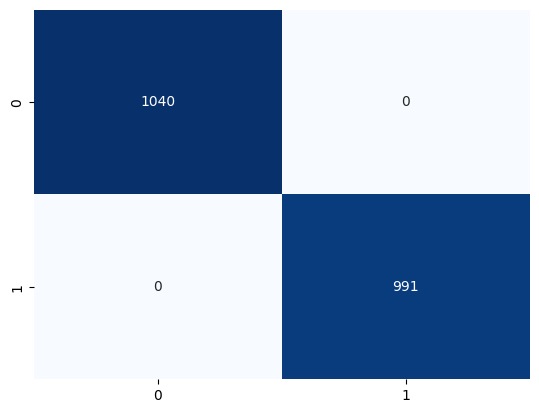

In [15]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

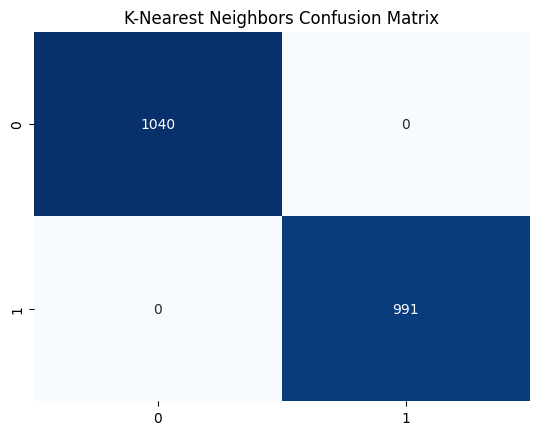

In [17]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix')

In [18]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

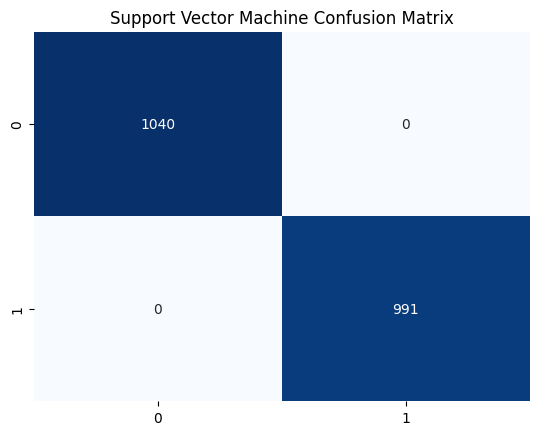

In [19]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_train_acc = round(accuracy_score(y_train,svm.predict(X_train))*100,2)
svm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Support Vector Machine Confusion Matrix')

In [20]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

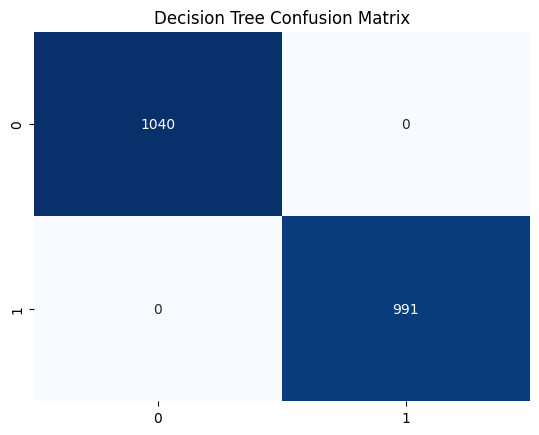

In [21]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)

sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')

In [22]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

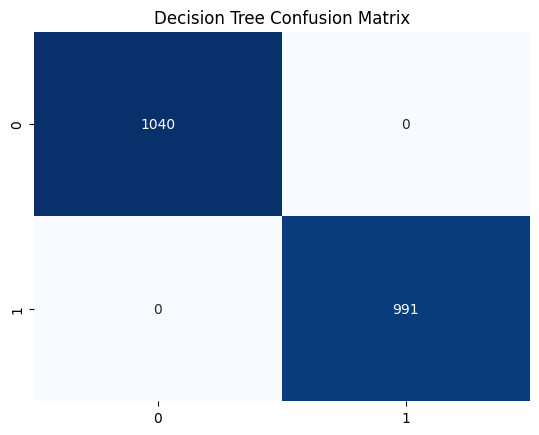

In [23]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')

In [24]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

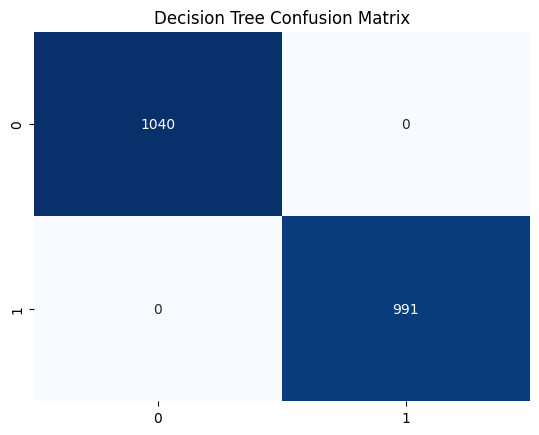

In [25]:
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
xg_train_acc = round(accuracy_score(y_train,xg.predict(X_train))*100,2)
xg_test_acc = round(accuracy_score(y_test,y_pred)*100,2)

sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')

In [26]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Linear Support Vector Machines'
        ,'Decision Tree',
        'Random Forest','XGBoost Classifier'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,svm_train_acc,tree_train_acc,rdm_train_acc,xg_train_acc
    ],
    'Testing Accuracy': [
       lr_test_acc,knn_test_acc,svm_test_acc,tree_test_acc,rdm_test_acc,xg_test_acc
    ]
})

In [27]:
models.sort_values(by=['Testing Accuracy','Training Accuracy'], ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,100.000000,100.000000
1,K Nearest Neighbors,100.000000,100.000000
2,Linear Support Vector Machines,100.000000,100.000000
3,Decision Tree,100.000000,100.000000
4,Random Forest,100.000000,100.000000
5,XGBoost Classifier,100.000000,100.000000


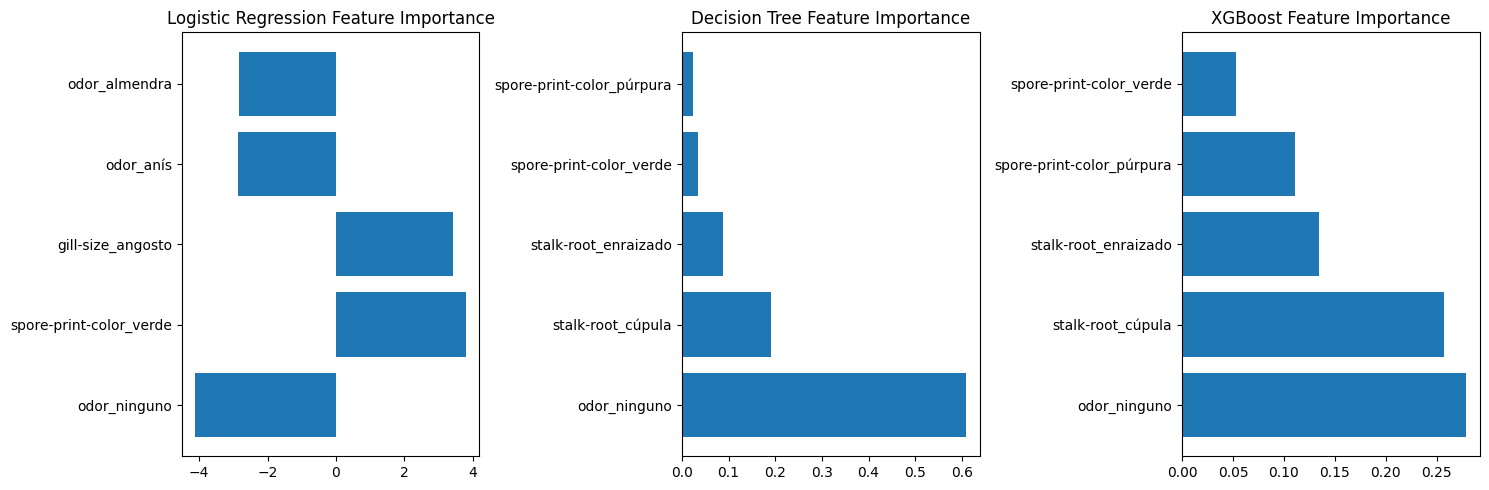

In [28]:
# Function to get top 5 features and their importances
def get_top5_features(features, importances):
    df = pd.DataFrame({'feature': features, 'importance': importances})
    df = df.reindex(df.importance.abs().sort_values(ascending=False).index)
    return df.head(5)

# Get top 5 features for each classifier
lr_top5 = get_top5_features(X.columns, lr.coef_[0])
tree_top5 = get_top5_features(X.columns, tree.feature_importances_)
xg_top5 = get_top5_features(X.columns, xg.feature_importances_)

plt.figure(figsize=(15,5))

# Plot for Logistic Regression
plt.subplot(1,3,1)
plt.barh(lr_top5['feature'], lr_top5['importance'])
plt.title('Logistic Regression Feature Importance')

# Plot for Decision Tree
plt.subplot(1,3,2)
plt.barh(tree_top5['feature'], tree_top5['importance'])
plt.title('Decision Tree Feature Importance')

# Plot for XGBoost
plt.subplot(1,3,3)
plt.barh(xg_top5['feature'], xg_top5['importance'])
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()

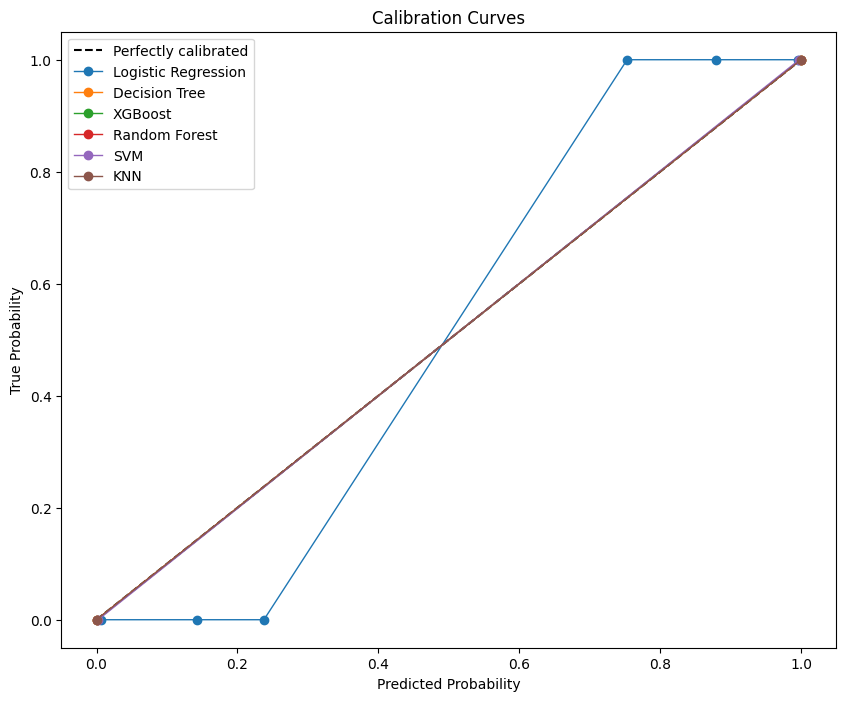

In [30]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import matplotlib.pyplot as plt

# List of models
models = [lr, tree, xg, rdm_frst, svm, knn]
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Random Forest', 'SVM', 'KNN']

plt.figure(figsize=(10, 8))

# Plot the perfectly calibrated line
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')

# Generate calibration curve for each model
for model, name in zip(models, model_names):
    # Calibrate SVM
    if name == 'SVM':
        model = CalibratedClassifierCV(model)
        model.fit(X_train, y_train)
        
    # Get the predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Generate the calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

    # Plot the calibration curve
    plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=name)

plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curves')
plt.legend()
plt.show()